## Wind Chill Prediction
In this mini project, I experiment with sklearn and statsmodels linear regression packages to predict the Wind_Chill variable in a resampled subset of the US_Accidents Dec2019 dataset. The complete dataset, downloaded from kaggle, has close to 3million rows.<br>
Training of the model was done using a subset of the dataset containing over 1.12million rows (all rows with missing values were dropped). 20% of the data was used for testing of the model. Below is a brief summary. 

## Summary:

A combination of the 6 numerical features available were tested to predict Wind_Chill. Six of these unique models are listed in the table below. Both sklearn(in black) and OLS(in red) were tried for various models. The best results, in terms of minimum MAE and RMSE, were observed by including Temperature/Humidity and Wind_Speed only, in the model.
The coefficients and intercept are shown in the table.<br>


The missing values of the 3 features used in predicting the Wind_Chill were filled with the mean or median. The choice was made after running both and comparing the statistics to the actual variables in the dataset.<br>
The predicted Wind_Chill data values were filled in the missing value cells of the dataframe and the file saved as: 	__dec19_400k_rs1_edt_fillna.csv__	


		
![image.png](attachment:image.png)

| target: Wind_Chill                  |             |             |             |        |        |                                                               |              |
|-------------------------------------|-------------|-------------|-------------|--------|--------|---------------------------------------------------------------|--------------|
| Features                            | R2          | AdjustedR2  | std         | mae    | rmse   | Coefficients                                                  | Intercepts   |
| Temperature/Humidity                | 0.9903      | 0.9903      | 25.07045246 | 1.938  | 2.482  | [1.16278499, 0.02794495]                                      | -13.69628535 |
| Precipitation/WindSpeed             | 0.0146      | 0.0146      | 2.684       | 17.777 | 21.906 | [-4.65993377, -0.47135364]                                    | 64.08194     |
| Temperature/Precipitation/WindSpeed | 0.9915      | 0.9915      | 21.975      | 1.578  | 2.039  | [ 1.12017265, -0.03332019, -0.2205278 ]                       | -7.367791671 |
| All EXCEPT Temperature              | 0.2741      | 0.2741      | 11.555      | 15.148 | 18.795 | [-0.37570596  1.98379827  1.67595964 -0.55857869  4.48282525] | 16.77598176  |
| Temperature/Humidity/Wind_Speed     | 0.993675885 | 0.9937      | 25.114      | 1.530  | 2.003  | [ 1.14924003  0.01481273 -0.28167724]                         | -9.878166266 |
| Temperature/Humidity                |             |             |             |        |        |                                                               |              |
| Wind_Speed                          | 0.0370      | 0.0370      | 0.004       |        |        |                                                               |              |
| Temperature/Humidity/Wind_Speed     | 0.9940      | 0.9937      | 25.114      |        |        |                                                               |              |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression


In [6]:
# read in dataset
df = pd.read_csv('US_Accidents_Dec19.csv')

In [7]:
# form dataframe with relevant variables
data =  df[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Wind_Chill(F)' ]]

In [8]:
# rename columns
data.columns = ['Temperature', 'Humidity', 'Pressure', 'Visibility', 'Wind_Speed', 'Precipitation',  'Wind_Chill' ]

In [9]:
# Count number of nulls
n = pd.DataFrame(data.isnull().sum())
n.columns=['Number of Missing Values']
n

,Number of Missing Values
Temperature,56063
Humidity,59173
Pressure,48142
Visibility,65691
Wind_Speed,440840
Precipitation,1998358
Wind_Chill,1852623


In [10]:
# Count number of non-nulls
n2 = pd.DataFrame(data.notnull().sum())
n2.columns=['Number of Notnull']
n2

,Number of Notnull
Temperature,2918272
Humidity,2915162
Pressure,2926193
Visibility,2908644
Wind_Speed,2533495
Precipitation,975977
Wind_Chill,1121712


In [11]:
feature_names = ['Temperature', 'Humidity', 'Wind_Speed']
target_name = 'Wind_Chill'

In [12]:
# drop all rows with missing data, and select features and target for model
data_sub =  pd.concat([data[feature_names], data[target_name]], axis=1).dropna()
data_sub.describe()

,Temperature,Humidity,Wind_Speed,Wind_Chill
count,1.120446e+06,1.120446e+06,1.120446e+06,1.120446e+06
mean,5.432662e+01,6.639477e+01,7.842217e+00,5.133033e+01
std,2.172911e+01,2.186651e+01,5.354729e+00,2.519188e+01
min,-2.900000e+01,1.000000e+00,0.000000e+00,-5.900000e+01
25%,3.740000e+01,5.100000e+01,4.600000e+00,3.200000e+01
50%,5.400000e+01,6.900000e+01,7.000000e+00,5.400000e+01
75%,7.300000e+01,8.500000e+01,1.040000e+01,7.300000e+01
max,1.150000e+02,1.000000e+02,2.550000e+02,1.150000e+02


In [13]:
# feature and target names as variables

X = data_sub[feature_names]              
y = data_sub[target_name]                


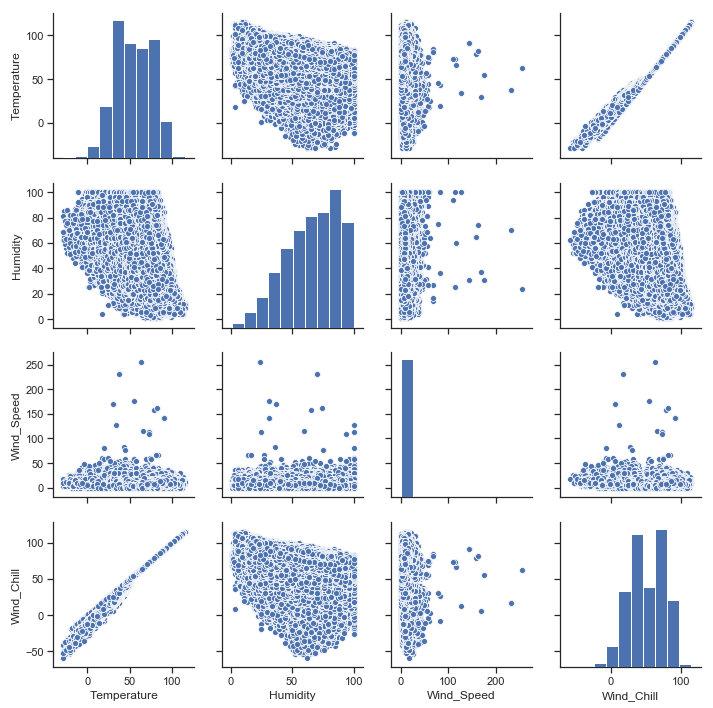

In [14]:
# pairplot target and features
# Strongest correlation to Wind_Chill, with minimum scatter is with Temperature

sns.set(style="ticks", color_codes=True)
sns.pairplot(data_sub)

In [15]:
# split into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [16]:
# fit data and show score

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
lr.score(X_test, y_test)

0.9936506482583974

In [22]:
print('Coefficients: \n', lr.coef_) 

Coefficients: 
 [ 1.14924003  0.01481273 -0.28167724]


In [23]:
print('Intercepts: \n', lr.intercept_) 

Intercepts: 
 -9.87816626635275


In [24]:
print('Variance score: {}'.format(lr.score(X_test, y_test))) 

Variance score: 0.9936506482583974


In [25]:
np.std(lr.predict(X))

25.113867762805473

In [26]:
np.median(lr.predict(X))

51.00208297441607

In [27]:
np.max(lr.predict(X))

120.17914659032893

In [28]:
np.mean(lr.predict(X))

51.330669081677215

In [29]:
np.min(lr.predict(X))

-47.47059935064839

In [30]:
np.min(y)

-59.0

In [31]:
# R2 calculation
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(X))
r2

0.9936758853671162

In [32]:
# calculate rmse:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(data_sub[target_name], lr.predict(X)))

print(rmse)

2.003366040515391


In [33]:
# calculate mae:
mae = (metrics.mean_absolute_error(data_sub[target_name], lr.predict(X)))
mae

1.530242369644165

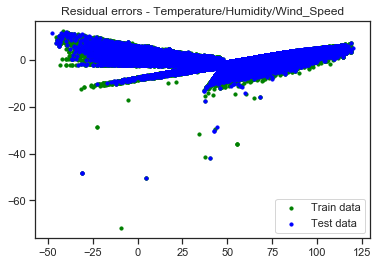

In [34]:
## setting plot style 
#plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 

## plotting legend 
plt.legend(loc = 'lower right') 
  
## plot title 
plt.title("Residual errors - Temperature/Humidity/Wind_Speed") 
  
## function to show plot 
plt.show() 

In [35]:
# calculate residuals
resids = y - lr.predict(X)

print(resids.describe().round(3),  # residuals stats
      pd.DataFrame(lr.predict(X)).describe().round(3),sep='\n\n') # predicted Wind_Chill stats

count    1120446.000
mean          -0.000
std            2.003
min          -12.201
25%           -1.266
50%           -0.104
75%            1.187
max           71.948
Name: Wind_Chill, dtype: float64

                 0
count  1120446.000
mean        51.331
std         25.114
min        -47.471
25%         31.753
50%         51.002
75%         72.578
max        120.179


In [36]:
data_sub.tail(4)

,Temperature,Humidity,Wind_Speed,Wind_Chill
2974331,70.0,73.0,6.0,70.0
2974332,73.0,64.0,10.0,73.0
2974333,71.0,81.0,8.0,71.0
2974334,79.0,47.0,7.0,79.0


In [37]:
lr.predict([[70, 73, 6]])   # test prediction 1

array([69.95990142])

In [38]:
data_sub[99995:99999]

,Temperature,Humidity,Wind_Speed,Wind_Chill
550753,44.0,64.0,5.0,41.0
550754,44.0,64.0,5.0,41.0
550755,46.0,61.0,13.0,40.0
550756,32.0,75.0,12.0,23.0


In [39]:
lr.predict([[-9, 75, 11.5]]) # test prediction 2

array([-22.34966035])

In [40]:
from sklearn.feature_selection import f_regression   # calculate f-statisics and p-values

In [41]:
f_regression(X,y)  # 1st array f-statistics, 2nd array p-values

(array([1.08380868e+08, 1.17459206e+05, 4.30830143e+04]), array([0., 0., 0.]))

In [42]:
p_values = f_regression(X,y)[1]
p_values.round(5)

array([0., 0., 0.])

In [43]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
# Building same model using ols
m = ols('Wind_Chill ~ Temperature + Humidity+ Wind_Speed',data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:             Wind_Chill   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 5.868e+07
Date:                Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:13:01   Log-Likelihood:            -2.3684e+06
No. Observations:             1120446   AIC:                         4.737e+06
Df Residuals:                 1120442   BIC:                         4.737e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -9.8876      0.010   -941.943      

In [45]:
np.max(m.fittedvalues)

120.17469470920697

### Predicting & filling missing Wind_Chill values:

In [2]:
df2 = pd.read_csv('dec19_400k_rs1_edt.csv')

In [3]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Source', 'TMC', 'Severity',
       'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Day_of_Week', 'Hour_of_Day',
       'Precipitation_wasnull', 'Wind_Chill_wasnull', 'Wind_Speed_wasnull',
       'Visibility_wasnull', 'Humidity_wasnull', 'Temperature_wasnull',
       'Pressure_wasnull', 'Precipitation

In [4]:
df_for_WC_predict = df2[['Temperature_filled_mean', 'Humidity_filled_mean', 'Wind_Speed_filled_median']]

In [17]:
WC_predicted = lr.predict(df_for_WC_predict)# predicted Wind_Chill
type(WC_predicted)

numpy.ndarray

In [18]:
WC_predict = pd.Series(WC_predicted.tolist()) # convert ndarray to list

In [19]:
#Fill Wind_Chill missing values in the dataframe
df2['Wind_Chill_predicted_filled'] =  df2['Wind_Chill(F)'].fillna(WC_predict)

In [20]:
df2[['Wind_Chill(F)', 'Wind_Chill_predicted_filled']].head()

,Wind_Chill(F),Wind_Chill_predicted_filled
0,NaN,85.706876
1,77.0,77.000000
2,NaN,79.883464
3,53.0,53.000000
4,49.0,49.000000


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 69 columns):
Unnamed: 0                     400000 non-null int64
Unnamed: 0.1                   400000 non-null int64
ID                             400000 non-null object
Source                         400000 non-null object
TMC                            301701 non-null float64
Severity                       400000 non-null int64
Start_Time                     400000 non-null object
End_Time                       400000 non-null object
Start_Lat                      400000 non-null float64
Start_Lng                      400000 non-null float64
End_Lat                        98299 non-null float64
End_Lng                        98299 non-null float64
Distance(mi)                   400000 non-null float64
Description                    400000 non-null object
Number                         141503 non-null float64
Street                         400000 non-null object
Side                   

In [22]:
# Save edited file:

#df2.to_csv('dec19_400k_rs1_edt_fillna.csv')